In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder

<h3>Загрузка и предобработка датасета</h3>

In [13]:
#загрузка датасета
df = pd.read_csv('coords_data_numerated.csv')
df = df.drop(columns=['Unnamed: 0', 'GSR'])
df.head()

,id,BreathingType,TimeStamp_sec,FirstMarkerXCoord,FirstMarkerYCoord,FirstMarkerZCoord,SecondMarkerXCoord,SecondMarkerYCoord,SecondMarkerZCoord,ThirdMarkerXCoord,ThirdMarkerYCoord,ThirdMarkerZCoord
0,1,0,0.058895,0.689,-1.453,4.417,0.881,-1.544,4.547,0.718,-1.607,4.369
1,1,0,0.111889,0.687,-1.452,4.418,0.881,-1.544,4.547,0.715,-1.607,4.371
2,1,0,0.158371,0.687,-1.451,4.419,0.881,-1.544,4.545,0.714,-1.607,4.371
3,1,0,0.262516,0.685,-1.450,4.420,0.882,-1.544,4.541,0.711,-1.608,4.373
4,1,0,0.295620,0.684,-1.449,4.420,0.883,-1.544,4.540,0.709,-1.607,4.370


In [14]:
#Определение выходного признака и входных признаков
y = df['BreathingType']
X = df.drop(columns=['BreathingType'])
X.tail()

,id,TimeStamp_sec,FirstMarkerXCoord,FirstMarkerYCoord,FirstMarkerZCoord,SecondMarkerXCoord,SecondMarkerYCoord,SecondMarkerZCoord,ThirdMarkerXCoord,ThirdMarkerYCoord,ThirdMarkerZCoord
230921,258,59.76925,1.063,-1.649,3.843,1.093,-1.839,3.624,1.030,-1.867,3.859
230922,258,59.80188,1.062,-1.648,3.842,1.094,-1.841,3.625,1.030,-1.867,3.857
230923,258,59.90696,1.062,-1.648,3.842,1.093,-1.841,3.624,1.030,-1.868,3.855
230924,258,59.92954,1.063,-1.647,3.842,1.094,-1.841,3.624,1.029,-1.868,3.853
230925,258,59.99477,1.063,-1.647,3.842,1.094,-1.841,3.623,1.030,-1.868,3.853


In [15]:
#переименование столбцов
dict_renames = {
    'FirstMarkerXCoord' : 'FMX',
    'FirstMarkerYCoord' : 'FMY',
    'FirstMarkerZCoord' : 'FMZ',
    'SecondMarkerXCoord' :  'SMX',
    'SecondMarkerYCoord' : 'SMY',
    'SecondMarkerZCoord' : 'SMZ',
    'ThirdMarkerXCoord' : 'TMX',
    'ThirdMarkerYCoord' : 'TMY',
    'ThirdMarkerZCoord' : 'TMZ'
}
X = X.rename(columns=dict_renames)
X.head()

,id,TimeStamp_sec,FMX,FMY,FMZ,SMX,SMY,SMZ,TMX,TMY,TMZ
0,1,0.058895,0.689,-1.453,4.417,0.881,-1.544,4.547,0.718,-1.607,4.369
1,1,0.111889,0.687,-1.452,4.418,0.881,-1.544,4.547,0.715,-1.607,4.371
2,1,0.158371,0.687,-1.451,4.419,0.881,-1.544,4.545,0.714,-1.607,4.371
3,1,0.262516,0.685,-1.450,4.420,0.882,-1.544,4.541,0.711,-1.608,4.373
4,1,0.295620,0.684,-1.449,4.420,0.883,-1.544,4.540,0.709,-1.607,4.370


<h3>Извлечение признаков с помощью библиотеки TSFEL</h3>

In [19]:
import tsfel

In [20]:
#расчет для всех 9 столбцов
numeric_cols = X.drop(columns=['id', 'TimeStamp_sec'])

In [21]:
cfg = tsfel.get_features_by_domain()

In [22]:
def calc_tsfel_features(prefix, col_values):
    df_extracted_features = tsfel.time_series_features_extractor(cfg, col_values, verbose=0)
    for column in df_extracted_features.columns:
        df_extracted_features.rename(columns = {column : prefix + column[1:]}, inplace=True)
    return df_extracted_features

In [ ]:
#расчет новых признаков
new_features = pd.DataFrame()
for i in range(1, 259):
    print(i)
    ts_features = pd.DataFrame()
    #расчет статистических показателей по каждому столбцу
    for col in numeric_cols:
        col_values = X[X['id'] == i][col].reset_index(drop=True)
        prefix = col+"_"
        tsfel_features = calc_tsfel_features(prefix, col_values)
        ts_features = pd.concat([ts_features, tsfel_features], axis=1)
    new_features = pd.concat([new_features, ts_features], axis=0, ignore_index=True)

In [33]:
new_features = new_features.dropna(axis=1)

In [34]:
new_features.to_csv('tsfel_features.csv')

In [ ]:
new_features = pd.read_csv('tsfel_features.csv')
new_features = new_features.drop(columns=['Unnamed: 0'])
new_features

In [36]:
features_filtered = new_features.loc[:,~new_features.columns.duplicated()].copy()

In [37]:
features_filtered.head()

,FMX__FFT mean coefficient_0,FMX__FFT mean coefficient_1,FMX__FFT mean coefficient_2,FMX__FFT mean coefficient_3,FMX__FFT mean coefficient_4,FMX__FFT mean coefficient_5,FMX__FFT mean coefficient_6,FMX__FFT mean coefficient_7,FMX__FFT mean coefficient_8,FMX__FFT mean coefficient_9,...,TMZ__Median diff,TMZ__Negative turning points,TMZ__Neighbourhood peaks,TMZ__Peak to peak distance,TMZ__Positive turning points,TMZ__Signal distance,TMZ__Slope,TMZ__Sum absolute diff,TMZ__Total energy,TMZ__Zero crossing rate
0,1.007195e-05,0.000678,0.000012,0.000046,0.000056,0.000021,0.000003,0.000003,0.000002,0.000003,...,0.0,37.0,3.0,0.038,32.0,900.000837,0.000006,0.903,1905.011922,0.0
1,6.620634e-08,0.000443,0.000052,0.000028,0.000010,0.000026,0.000074,0.000012,0.000009,0.000001,...,0.0,33.0,7.0,0.032,41.0,900.000797,-0.000009,0.881,1903.966848,0.0
2,5.115273e-05,0.000185,0.000079,0.000072,0.000029,0.000086,0.000007,0.000007,0.000019,0.000009,...,0.0,48.0,8.0,0.042,45.0,900.000887,0.000003,0.910,1907.228773,0.0
3,4.216376e-07,0.000098,0.000056,0.000004,0.000038,0.000019,0.000008,0.000001,0.000004,0.000002,...,0.0,37.0,12.0,0.093,45.0,900.001261,0.000050,1.145,1756.414095,0.0
4,9.073122e-10,0.000038,0.000014,0.000013,0.000001,0.000001,0.000002,0.000006,0.000016,0.000005,...,0.0,30.0,8.0,0.037,27.0,900.000768,0.000013,0.834,1743.787757,0.0


In [11]:
new_features = features_filtered

<h3>Добавление новых признаков в датасет</h3>

In [38]:
#загрузка датасета
data = pd.read_csv('breathes.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,ID,Date_Of_Birth,Sex,Had_Covid,Begin_Of_Covid,End_Of_Covid,Lung_Damage,Damage_Percent,Breathing_Type,Frequency,...,Sin_Period23,Sin_Amp23/Sin_Amp13,Sin_Amp12/Sin_Amp13,Sin_Amp12/Sin_Amp23,Sin_Omega23/Sin_Omega13,Sin_Omega12/Sin_Omega13,Sin_Omega12/Sin_Omega23,(Sin_Offset23/Sin_Offset13)^2,(Sin_Offset12/Sin_Offset13)^2,(Sin_Offset12/Sin_Offset23)^2
0,1,04.07.2003,M,No,00.00.0000,00.00.0000,No,-0.207005,грудное,-0.144237,...,-0.178712,0.002273,-0.001832,-0.032392,-0.156378,-0.155622,-0.156309,-0.088206,-0.063808,-0.059907
1,1,04.07.2003,M,No,00.00.0000,00.00.0000,No,-0.207005,брюшное,-0.464100,...,-0.189949,0.004160,-0.001251,-0.031075,-0.157239,-0.156233,-0.155913,-0.088137,-0.063796,-0.059920
2,1,04.07.2003,M,No,00.00.0000,00.00.0000,No,-0.207005,смешанное,-1.423688,...,-0.176731,0.002901,-0.001624,-0.030850,-0.156010,-0.154825,-0.155960,-0.088171,-0.063814,-0.059919
3,2,07.09.2001,M,No,00.00.0000,00.00.0000,No,-0.207005,грудное,-0.464100,...,-0.188340,0.001370,-0.003038,-0.030842,-0.150565,-0.157859,-0.162806,-0.088344,-0.063916,-0.059910
4,2,07.09.2001,M,No,00.00.0000,00.00.0000,No,-0.207005,брюшное,-0.464100,...,-0.183617,0.009269,-0.003303,-0.031408,-0.166810,-0.156948,-0.130142,-0.088307,-0.063910,-0.059921


In [39]:
#добавление новых признаков в датасет
i = 0
new_features_cols = new_features.columns
for id in range(1,87):
    for col in new_features_cols:
        data.loc[(data['Breathing_Type'] == 'грудное') & (data['ID'] == id), col] = new_features.loc[i][col]
    i += 1
    for col in new_features_cols:
        data.loc[(data['Breathing_Type'] == 'брюшное') & (data['ID'] == id), col] = new_features.loc[i][col]
    i += 1
    for col in new_features_cols:
        data.loc[(data['Breathing_Type'] == 'смешанное') & (data['ID'] == id), col] = new_features.loc[i][col]
    i += 1

C:\Users\admin\AppData\Local\Temp\ipykernel_3768\1940245523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.loc[(data['Breathing_Type'] == 'грудное') & (data['ID'] == id), col] = new_features.loc[i][col]
C:\Users\admin\AppData\Local\Temp\ipykernel_3768\1940245523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.loc[(data['Breathing_Type'] == 'грудное') & (data['ID'] == id), col] = new_features.loc[i][col]
C:\Users\admin\AppData\Local\Temp\ipykernel_3768\1940245523.py:6: PerformanceWarning: DataFrame is highly fr

In [40]:
data.head(15)

,ID,Date_Of_Birth,Sex,Had_Covid,Begin_Of_Covid,End_Of_Covid,Lung_Damage,Damage_Percent,Breathing_Type,Frequency,...,TMZ__Median diff,TMZ__Negative turning points,TMZ__Neighbourhood peaks,TMZ__Peak to peak distance,TMZ__Positive turning points,TMZ__Signal distance,TMZ__Slope,TMZ__Sum absolute diff,TMZ__Total energy,TMZ__Zero crossing rate
0,1,04.07.2003,M,No,00.00.0000,00.00.0000,No,-0.207005,грудное,-0.144237,...,0.0,37.0,3.0,0.038,32.0,900.000837,6.467643e-06,0.903,1905.011922,0.0
1,1,04.07.2003,M,No,00.00.0000,00.00.0000,No,-0.207005,брюшное,-0.464100,...,0.0,33.0,7.0,0.032,41.0,900.000797,-9.027335e-06,0.881,1903.966848,0.0
2,1,04.07.2003,M,No,00.00.0000,00.00.0000,No,-0.207005,смешанное,-1.423688,...,0.0,48.0,8.0,0.042,45.0,900.000887,2.722720e-06,0.910,1907.228773,0.0
3,2,07.09.2001,M,No,00.00.0000,00.00.0000,No,-0.207005,грудное,-0.464100,...,0.0,37.0,12.0,0.093,45.0,900.001261,5.011446e-05,1.145,1756.414095,0.0
4,2,07.09.2001,M,No,00.00.0000,00.00.0000,No,-0.207005,брюшное,-0.464100,...,0.0,30.0,8.0,0.037,27.0,900.000768,1.293732e-05,0.834,1743.787757,0.0
5,2,07.09.2001,M,No,00.00.0000,00.00.0000,No,-0.207005,смешанное,-0.464100,...,0.0,28.0,4.0,0.063,25.0,899.000990,9.141616e-06,0.955,1789.842442,0.0
6,3,14.04.2003,M,No,00.00.0000,00.00.0000,No,-0.207005,грудное,2.734525,...,0.0,37.0,5.0,0.034,33.0,900.000379,-1.656586e-05,0.552,1758.922218,0.0
7,3,14.04.2003,M,No,00.00.0000,00.00.0000,No,-0.207005,брюшное,-0.144237,...,0.0,36.0,10.0,0.035,42.0,899.000890,-1.315048e-05,0.921,1790.568372,0.0
8,3,14.04.2003,M,No,00.00.0000,00.00.0000,No,-0.207005,смешанное,-0.624031,...,0.0,45.0,8.0,0.056,46.0,900.000609,-7.333479e-06,0.715,1774.866727,0.0
9,4,24.11.2003,M,Yes,05.11.2021,19.11.2021,No,-0.207005,грудное,-0.304169,...,0.0,47.0,9.0,0.029,41.0,899.000698,2.263377e-09,0.828,1667.995029,0.0


<h3>Подготовка датасета для тестирования</h3>

In [41]:
#отбрасывание ненужных столбцов
categorical_cols = ['Sex', 'Had_Covid', 'Lung_Damage', 'DominatorFreq']
drop_columns = ['Date_Of_Birth', 'Begin_Of_Covid', 'End_Of_Covid'] + categorical_cols
df = data.drop(columns=drop_columns)
#целевой признак
y = df['Breathing_Type']
#определение численных признаков
non_numerical_cols = ['ID', 'Breathing_Type']
X = df.drop(columns=non_numerical_cols)
#трансформация категориальных признаков
le = LabelEncoder()
y = le.fit_transform(y)

In [42]:
#разделение на обучающую(70%) и тестовую (30%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
#расчет метрик по тесовой выборке
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("F1-score: ", f1)
    report = classification_report(y_test, y_pred)
    print(report)

#расчет знамости признаков
def calc_feature_importances(model, X_df):
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': X_df.columns, 'Importance': importance})
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    return feature_importance

<h2>Тестирование новых признаков</h2>

<h3>Метод взаимной информации</h3>

In [44]:
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif

selector = GenericUnivariateSelect(mutual_info_classif, mode='k_best', param=100)

In [45]:
X_new = selector.fit_transform(X, y)

In [49]:
importance = selector.scores_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Scores': importance, 'Support': selector.get_support()})
#feature_importance = feature_importance.sort_values('Scores', ascending=False)
feature_importance

,Feature,Scores,Support
0,Damage_Percent,0.000000,False
1,Frequency,0.001680,False
2,Amplitude,0.000000,False
3,DominatorFreqPower,0.012409,False
4,D_1_2_Avg,0.000000,False
...,...,...,...
1933,TMZ__Signal distance,0.050748,False
1934,TMZ__Slope,0.039398,False
1935,TMZ__Sum absolute diff,0.031969,False
1936,TMZ__Total energy,0.000000,False


In [48]:
feature_importance.to_excel('mutual_features.xlsx')

In [50]:
bad_features = feature_importance[feature_importance['Support'] == False]
drop_columns = list(bad_features['Feature'])
drop_columns
X2 = X.drop(columns=drop_columns)
X2.head()

,Sin_Amp12,Sin_Amp12/Sin_Amp23,Sin_Omega12/Sin_Omega23,FMX__FFT mean coefficient_1,FMX__FFT mean coefficient_11,FMX__FFT mean coefficient_13,FMX__FFT mean coefficient_15,FMX__FFT mean coefficient_39,FMX__FFT mean coefficient_42,FMX__FFT mean coefficient_64,...,TMY__MFCC_0,TMY__MFCC_10,TMY__Standard deviation,TMY__Variance,TMZ__FFT mean coefficient_13,TMZ__FFT mean coefficient_24,TMZ__FFT mean coefficient_35,TMZ__FFT mean coefficient_55,TMZ__ECDF_4,TMZ__Histogram_3
0,-0.034874,-0.032392,-0.156309,0.000678,1.006701e-06,9.661038e-07,9.560974e-08,1.350932e-08,1.911624e-08,1.544081e-08,...,-0.224144,-1.679159,0.003701,0.000014,0.000001,2.012216e-07,5.714397e-08,8.092763e-08,0.005549,0.0
1,-0.034173,-0.031075,-0.155913,0.000443,7.406067e-07,3.015461e-06,1.412035e-07,7.675142e-09,6.646021e-11,1.527330e-08,...,-0.260905,-1.617206,0.002578,0.000007,0.000007,3.368022e-06,1.081701e-06,1.480420e-07,0.005549,0.0
2,-0.035428,-0.030850,-0.155960,0.000185,5.177564e-06,2.682599e-06,7.997977e-07,1.206914e-08,1.217651e-08,1.814529e-09,...,-0.217797,-1.154979,0.005116,0.000026,0.000004,1.416296e-06,2.518749e-07,7.241040e-08,0.005549,0.0
3,-0.034864,-0.030842,-0.162806,0.000098,1.029062e-07,1.862427e-07,6.411501e-07,7.546903e-09,7.642338e-09,3.926584e-09,...,-0.173788,-1.192022,0.002694,0.000007,0.000005,1.543448e-06,7.009236e-09,6.968291e-08,0.005549,0.0
4,-0.034066,-0.031408,-0.130142,0.000038,3.318381e-07,1.722528e-06,4.244164e-08,4.220157e-09,9.484336e-09,1.039845e-08,...,-0.279891,-0.884499,0.002416,0.000006,0.000007,6.593253e-07,7.423386e-08,1.358271e-08,0.005549,0.0


In [51]:
#разделение на обучающую(70%) и тестовую (30%) выборки
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

<h3>Permutation Importance</h3>

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

model_rf = RandomForestClassifier()

In [53]:
res = model_rf.fit(X_train, y_train)

In [54]:
result = permutation_importance(model_rf, X_test, y_test, n_repeats=10, random_state=42)

In [57]:
importance = []
std = []
for i, feature in enumerate(X2.columns):
    importance.append(result.importances_mean[i])
    std.append(result.importances_std[i])
    print(f'{feature}: {importance[i]} +- {std[i]}')

Sin_Amp12: 0.009210526315789436 +- 0.008425163470306357
Sin_Amp12/Sin_Amp23: 0.0684210526315789 +- 0.02683694480838308
Sin_Omega12/Sin_Omega23: 0.013157894736842058 +- 0.011768778828946237
FMX__FFT mean coefficient_1: 0.028947368421052576 +- 0.011470786693528056
FMX__FFT mean coefficient_11: -0.006578947368421084 +- 0.01060823387934021
FMX__FFT mean coefficient_13: 0.006578947368421029 +- 0.008826584121709674
FMX__FFT mean coefficient_15: -0.003947368421052655 +- 0.008425163470306384
FMX__FFT mean coefficient_39: 0.0 +- 0.0
FMX__FFT mean coefficient_42: 0.0 +- 0.0
FMX__FFT mean coefficient_64: 0.0 +- 0.0
FMX__FFT mean coefficient_70: 0.0 +- 0.0
FMX__FFT mean coefficient_79: 0.0 +- 0.0
FMX__LPCC_4: -0.006578947368421084 +- 0.012130979549069608
FMX__LPCC_8: 0.009210526315789424 +- 0.006029704861783968
FMX__MFCC_2: -0.01447368421052636 +- 0.007085743167282265
FMX__MFCC_5: 0.003947368421052611 +- 0.006029704861783968
FMX__Spectral entropy: 0.018421052631578904 +- 0.012059409723567983
FMX__

In [58]:
permutation_df = pd.DataFrame({'Feature': X2.columns, 'Mean score': importance, 'Std': std})

In [59]:
permutation_df = permutation_df.sort_values('Mean score', ascending=False)
permutation_df

,Feature,Mean score,Std
1,Sin_Amp12/Sin_Amp23,0.068421,0.026837
40,FMZ__MFCC_8,0.038158,0.012413
72,TMX__FFT mean coefficient_7,0.034211,0.018793
3,FMX__FFT mean coefficient_1,0.028947,0.011471
46,SMX__FFT mean coefficient_2,0.026316,0.008322
...,...,...,...
4,FMX__FFT mean coefficient_11,-0.006579,0.010608
30,FMY__Spectral decrease,-0.006579,0.022979
85,TMX__LPCC_8,-0.007895,0.008728
65,SMZ__FFT mean coefficient_7,-0.007895,0.013418


In [60]:
permutation_df.to_excel('permutation_features.xlsx')

<h3>SHAP</h3>

In [61]:
model = RandomForestClassifier()

In [62]:
import shap

C:\Users\admin\PycharmProjects\TimeSeriesLibraries\venv\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\admin\PycharmProjects\TimeSeriesLibraries\venv\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for detail

In [ ]:
res = model.fit(X_train, y_train)

In [64]:
explainer = shap.Explainer(model, X_train)

In [66]:
shap_values = explainer.shap_values(X_test, check_additivity=False)

In [81]:
importance_0 = []
importance_1 = []
importance_2 = []
for class_importances in shap_values:
    for i, importance in enumerate(class_importances):
        importance_0.append(np.mean(np.abs(importance)))

In [82]:
importance_0

[0.0031467705970404493,
 0.003780273757279793,
 0.0033848729784232996,
 0.0037350832907410226,
 0.003605339931159369,
 0.003623772175300837,
 0.003875552326776778,
 0.003974217414071245,
 0.0034322666205916902,
 0.003376280906995816,
 0.0040797539372189025,
 0.003891399942284261,
 0.004057072965774932,
 0.0035360205925659104,
 0.003707925353938116,
 0.004015199952801049,
 0.003224148376215817,
 0.003105567429826806,
 0.003882199947572008,
 0.0037510348728608733,
 0.004211211846784862,
 0.003605777733933246,
 0.0037423674357296476,
 0.0038518769341042577,
 0.004150063445874548,
 0.0041591800864702235,
 0.003507399951733896,
 0.004742537235707276,
 0.003730488065633653,
 0.002968263468501027,
 0.0055863570542387594,
 0.003447592014064866,
 0.004489310239707447,
 0.004593512636445484,
 0.0030933118888213356,
 0.0029179960083220062,
 0.003218143626737583,
 0.003802351543390614,
 0.0033202967917290156,
 0.004030704719202276,
 0.0030514983913399185,
 0.003748169799105563,
 0.0037983348887558

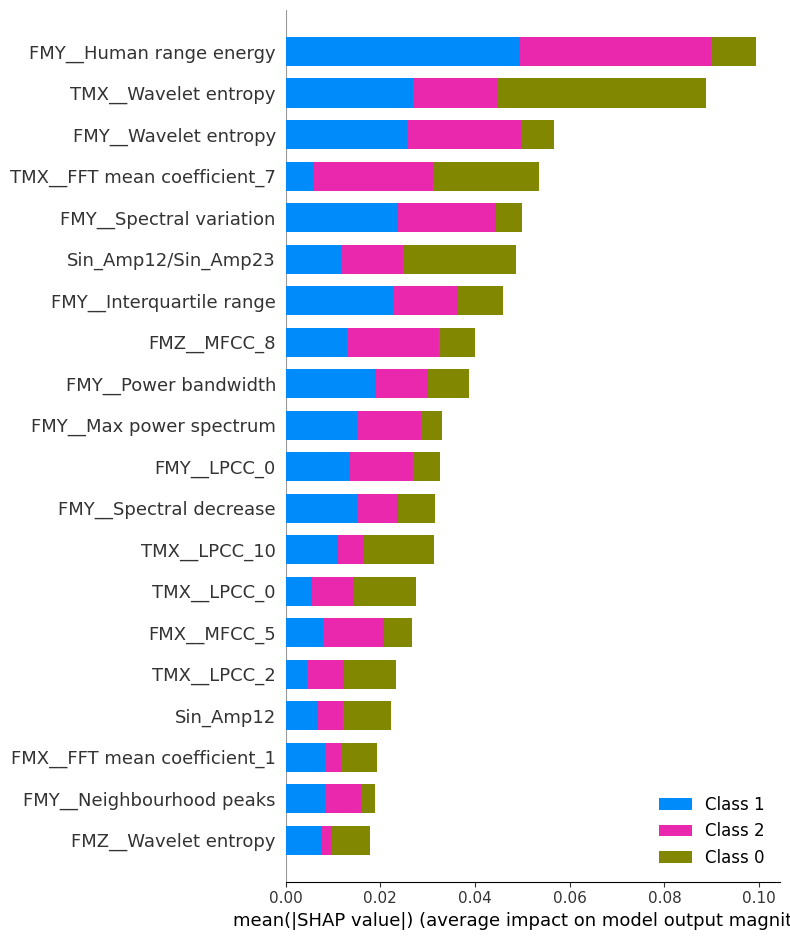

In [75]:
#class 0 - грудное
#class 1 - брюшное
#class 2 - смешанное
shap.summary_plot(shap_values, X2, plot_type='bar')